### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Loading the dataset (Comma Separated Values)

In [3]:
titanic_df=pd.read_csv('tested.csv')

### General Information of the dataset

In [4]:
titanic_df.shape

(418, 12)

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Some Info About The Fields:
##### Survival: 
If Survived=0 (Didn't Survived),
if Survived=1 (Survived)
##### Pclass:
If Pclass=1 (1st class Ticket Passanger),
if Pclass=2 (2nd class Ticket Passanger),
if Pclass=3 (3rd class Ticket Passanger)
##### SibSp:
Number of Siblings or Spouses aboard with the Passenger
##### Parch:
Number of Children or Parents aboard with the Passenger
##### Embarked
If Embarked=C (Cherbourg),
if Embarked=Q (Queenstown),
if Embarked=S (Southampton)

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Identification of the NaN values

In [9]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

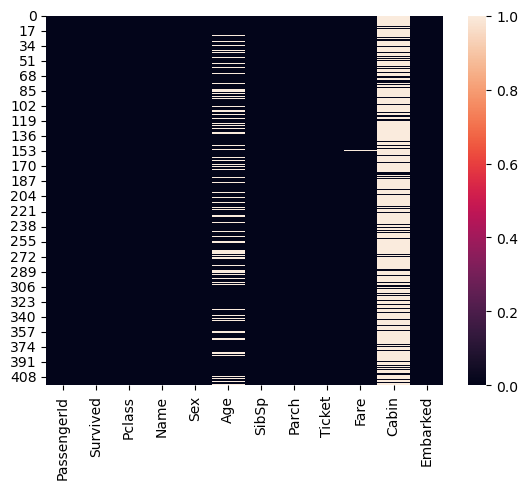

In [10]:
sns.heatmap(titanic_df.isna())

##### Filling values in place of NaN values 

In [11]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].mean(),inplace=True)

##### Dropping the unnecessary columns

In [12]:
titanic_df.drop(['Cabin','Name','Embarked','Sex'],axis=1,inplace=True)

In [13]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

#### Analysing data

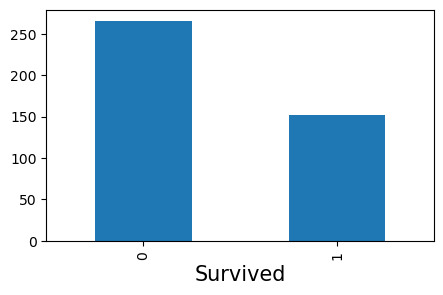

In [14]:
#To Show the distribution of the Survived passengers on the Titanic 

plt.figure(figsize=(5,3),dpi=100)
titanic_df.Survived.value_counts().plot(kind='bar')
plt.ylabel('')
plt.xlabel('Survived',fontdict={'fontsize':15})
plt.show()

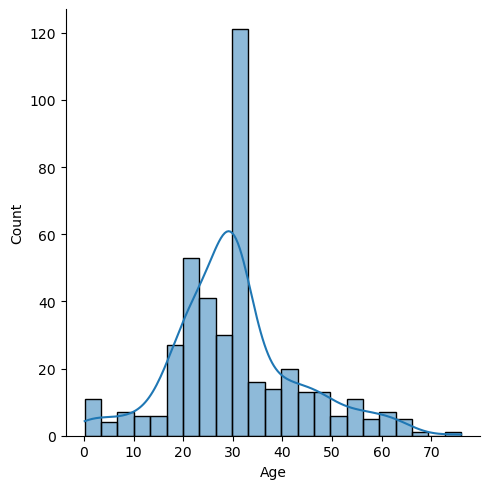

In [15]:
#To show the Age distribution of the Passengers on the Titanic
sns.displot(data=titanic_df,x='Age',kde=True)
plt.show()

#### Data Model Preparation

In [16]:
x=titanic_df[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]
y=titanic_df['Survived']

#### Data Modelling

###### Building a logistic regression model

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [18]:
lr=LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred=lr.predict(x_test)

#### Testing of the data

In [21]:
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted yes
Actual No,89,3
Actual Yes,38,8


In [22]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        92
           1       0.73      0.17      0.28        46

    accuracy                           0.70       138
   macro avg       0.71      0.57      0.55       138
weighted avg       0.71      0.70      0.64       138



In [23]:
acc=accuracy_score(y_test,y_pred)
print('Accuracy of the Logistic Regression: {}%'.format(acc*100))

Accuracy of the Logistic Regression: 70.28985507246377%
